In [38]:
getwd()
library("data.table")
library("stm")
integrumfed <- fread("/work/cloud-user/russia_finland/finland_russia/data/processed/integrum_federal.csv")



[1] "/work/cloud-user/russia_finland/finland_russia"

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [42]:
head(integrumfed)

id date       MediaDetail       MediaShort
1 1  01.11.2003 Известия (Москва) Известия  
2 2  03.11.2003 Известия (Москва) Известия  
3 3  04.11.2003 Известия (Москва) Известия  
4 4  05.11.2003 Известия (Москва) Известия  
5 5  06.11.2003 Известия (Москва) Известия  
6 6  06.11.2003 Известия (Москва) Известия  
  headline                                                                                                                
1 Владимир ВУЙТЕК, главный тренер хоккейного клуба ""Ак Барс"" (Казань): Когда ехал в Россию, думал, что знаю русский язык
2 Судьба Маргариты                                                                                                        
3 Девушка в кокошнике - лицо России                                                                                       
4 Не прошло и полвека                                                                                                     
5 ХРОНИКА                                                                                                                 
6 Олег ТВЕРДОВСКИЙ, защитник хоккейного клуба ""Авангард"": В Омске люди просто помешаны на хоккее                        
  content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [94]:
##remove columns to make the file thinner
integrumfed_id <- integrumfed[,c("id", "year", "lemmas_content")]

In [ ]:
make.dt

In [39]:
articlesintegrumfed <- as.data.frame(integrumfed_id)


In [45]:
head(integrumfed_id)

id
1 1 
2 2 
3 3 
4 4 
5 5 
6 6 
  lemmas_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [40]:
darianstopwords <- c(stopwords("russian"), "/n", "quot","nbsp","/n")

In [41]:
processed <- textProcessor(articlesintegrumfed$lemmas_content, metadata = articlesintegrumfed, stem=FALSE,customstopwords = darianstopwords)


Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Remove Custom Stopwords...
Removing numbers... 
Creating Output... 


In [60]:
saveRDS(processed, "processed_integrum_federal.rds")

In [46]:
out <- prepDocuments(processed$documents, processed$vocab, processed$meta, lower.thresh = 15)


Removing 150096 of 179505 terms (421351 of 6817891 tokens) due to frequency 
Removing 2 Documents with No Words 
Your corpus now has 25372 documents, 29409 terms and 6396540 tokens.

In [61]:
saveRDS(out, "out_integrum_federal.rds")

In [47]:
model.fit <- stm(out$documents, out$vocab, K = 30, prevalence =~ year, max.em.its = 100, data = out$meta, init.type = "Spectral")


Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...
	 Finding anchor words...
 	..............................
	 Recovering initialization...
 	....................................................................................................
Initialization complete.
....................................................................................................
Completed E-Step (147 seconds). 
Completed M-Step. 
Completing Iteration 1 (approx. per word bound = -8.590) 
....................................................................................................
Completed E-Step (78 seconds). 
Completed M-Step. 
Completing Iteration 2 (approx. per word bound = -7.853, relative change = 8.585e-02) 
....................................................................................................
Completed E-Step (64 seconds). 
Completed M-Step. 
Completing Iteration 3 (approx. per word bound =

In [106]:
saveRDS(model.fit, "STMfed30.rds")

In [111]:
model.fitK50 <- stm(out$documents, out$vocab, K = 50, prevalence =~ year, max.em.its = 100, data = out$meta, init.type = "Spectral")
saveRDS(model.fitK50, "STMfed50.rds")

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...


ERROR: Error in asMethod(object): Cholmod error 'out of memory' at file ../Core/cholmod_memory.c, line 147


In [108]:
model.fitKn <- stm(out$documents, out$vocab, K = 0, 
                   prevalence =~ year, max.em.its = 100, data = out$meta, init.type = "Spectral")
saveRDS(model.fitKn, "STMfedn.rds")

Beginning Spectral Initialization 
	 Calculating the gram matrix...
	 Using only 10000 most frequent terms during initialization...


ERROR: Error in .Arith.Csparse(e1, e2, .Generic, class. = "dgCMatrix"): Cholmod error 'out of memory' at file ../Core/cholmod_memory.c, line 147


In [ ]:
plot(regional_model_fit, "summary")

In [82]:
fed30dt <- make.dt(model.fit, meta = NULL)

In [73]:
library("wordcloud")
cloud(model.fit, topic=4)

ERROR: Error in library("wordcloud"): there is no package called ‘wordcloud’


In [83]:
head(fed30dt)

docnum Topic1       Topic2       Topic3       Topic4       Topic5      
1 1      0.0006901195 2.438267e-05 2.439581e-01 2.259384e-03 1.040922e-06
2 2      0.0001299479 3.074808e-06 8.341976e-01 5.891056e-03 4.608971e-07
3 3      0.0229743793 2.434512e-05 9.978114e-02 3.225740e-02 3.993688e-05
4 4      0.0002358590 2.034140e-06 2.612714e-02 1.063854e-03 9.683334e-07
5 5      0.0028760743 5.515281e-05 6.015918e-05 4.749332e-05 1.832929e-03
6 6      0.0008610340 3.524449e-05 1.062995e-01 1.391027e-03 3.111428e-06
  Topic6       Topic7       Topic8       Topic9       ⋯ Topic21     
1 7.310084e-06 8.872726e-02 1.442633e-04 2.266917e-04 ⋯ 4.893884e-04
2 2.462573e-05 1.325620e-04 9.360979e-05 7.428406e-06 ⋯ 6.096914e-05
3 1.158428e-04 2.152430e-04 8.318225e-04 1.319245e-03 ⋯ 6.147628e-04
4 1.150532e-05 6.717114e-05 6.131492e-04 1.356235e-04 ⋯ 1.723983e-04
5 6.899709e-05 6.253077e-05 1.111097e-03 5.011018e-01 ⋯ 3.501916e-02
6 6.671804e-06 1.815032e-01 3.550639e-04 3.331124e-04 ⋯ 9.683725e-04
  Topic22      Topic23      Topic24      Topic25      Topic26      Topic27    
1 2.126465e-03 0.0004792781 4.505738e-04 6.747615e-05 0.0001749411 0.001092395
2 9.176003e-05 0.0001164021 3.081403e-05 4.727634e-04 0.0001005632 0.098393130
3 2.027825e-01 0.0084669226 3.095218e-04 6.671543e-04 0.0021002224 0.024463287
4 8.295008e-04 0.0002101939 1.546969e-05 1.014625e-04 0.0068131534 0.334658027
5 7.600209e-02 0.0013788008 5.184128e-05 6.093634e-05 0.0009851557 0.000205302
6 3.954080e-03 0.0008124577 5.788739e-04 7.088138e-05 0.0005914714 0.001328564
  Topic28      Topic29      Topic30     
1 1.447060e-06 0.0058155936 0.0008687164
2 4.365512e-07 0.0004885154 0.0001597694
3 7.337534e-05 0.0016966049 0.0978729255
4 6.117209e-07 0.0002573895 0.0005930705
5 4.951006e-02 0.0001445193 0.0200723060
6 5.379103e-06 0.0083052383 0.0057890101

In [86]:
fed30topic4 <- fed30dt[,c("docnum","Topic4")]

In [96]:
head(fed30topic4)

id Topic4      
1 1  2.259384e-03
2 2  5.891056e-03
3 3  3.225740e-02
4 4  1.063854e-03
5 5  4.749332e-05
6 6  1.391027e-03

In [95]:
names(fed30topic4)[names(fed30topic4) == "docnum"] = "id"

In [100]:
topic4full <- merge(fed30topic4sort,integrumfed_id,by="id")

In [101]:
head(topic4full)

id Topic4       year
1 1  2.259384e-03 2003
2 2  5.891056e-03 2003
3 3  3.225740e-02 2003
4 4  1.063854e-03 2003
5 5  4.749332e-05 2003
6 6  1.391027e-03 2003
  lemmas_content                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [102]:
topic4full_sort <- topic4full[order(-Topic4)]

In [99]:
head(fed30topic4sort)

id    Topic4   
1 23774 0.9996679
2 23488 0.9994274
3 23560 0.6730085
4  2091 0.5538542
5 15518 0.5437729
6 14627 0.5280459

In [105]:
topic4toparticles <- print(topic4full_sort, nrows = 10, topn = 20)

          id       Topic4 year
    1: 23774 9.996679e-01 2013
    2: 23488 9.994274e-01 2012
    3: 23560 6.730085e-01 2012
    4:  2091 5.538542e-01 2014
    5: 15518 5.437729e-01 2007
    6: 14627 5.280459e-01 2001
    7: 23887 5.172843e-01 2013
    8: 10365 5.067801e-01 2007
    9: 23105 4.937480e-01 2010
   10: 15988 4.834512e-01 2009
   11: 15397 4.827843e-01 2007
   12:   311 4.808139e-01 2004
   13: 15584 4.696633e-01 2007
   14: 15514 4.653518e-01 2007
   15: 18990 4.628821e-01 2012
   16: 23678 4.590981e-01 2012
   17: 23124 4.574141e-01 2011
   18: 15309 4.548548e-01 2006
   19: 23169 4.540781e-01 2011
   20: 15031 4.467528e-01 2004
   ---                        
25348:  2809 1.727959e-06 2000
25349: 23917 1.725265e-06 2013
25350:  9755 1.718934e-06 2007
25351:  7153 1.623713e-06 2004
25352:  8646 1.502024e-06 2005
25353: 23566 1.470241e-06 2012
25354: 21547 1.453545e-06 2007
25355:  5322 1.437476e-06 2002
25356:  6033 1.416804e-06 2003
25357: 21446 1.326975e-06 2007
25358:  

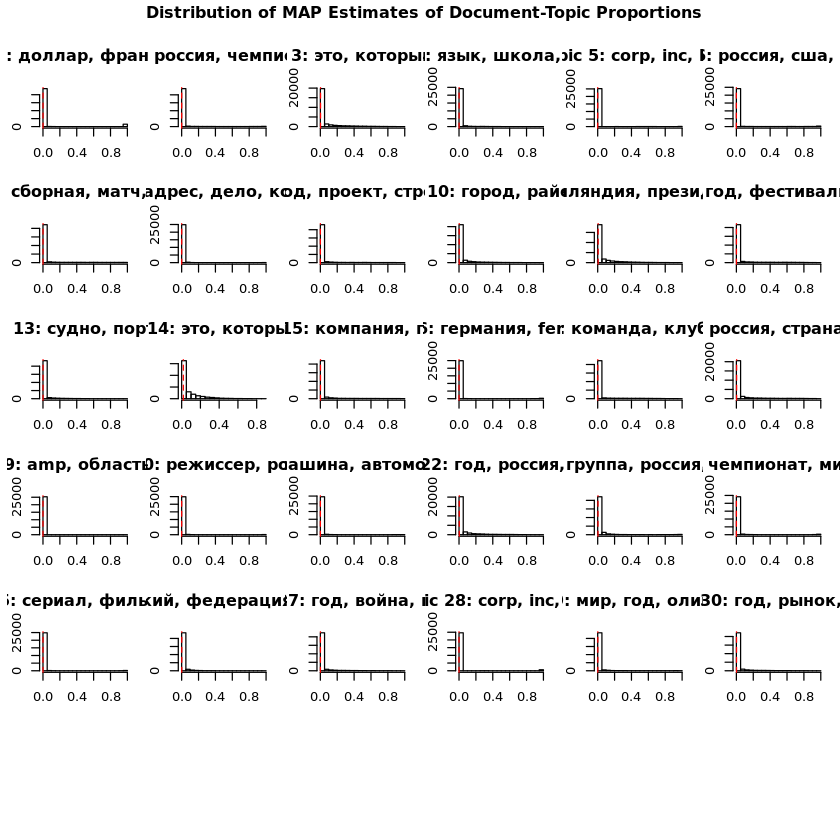

In [78]:
plot(model.fit,type="hist")



In [85]:
?data.table


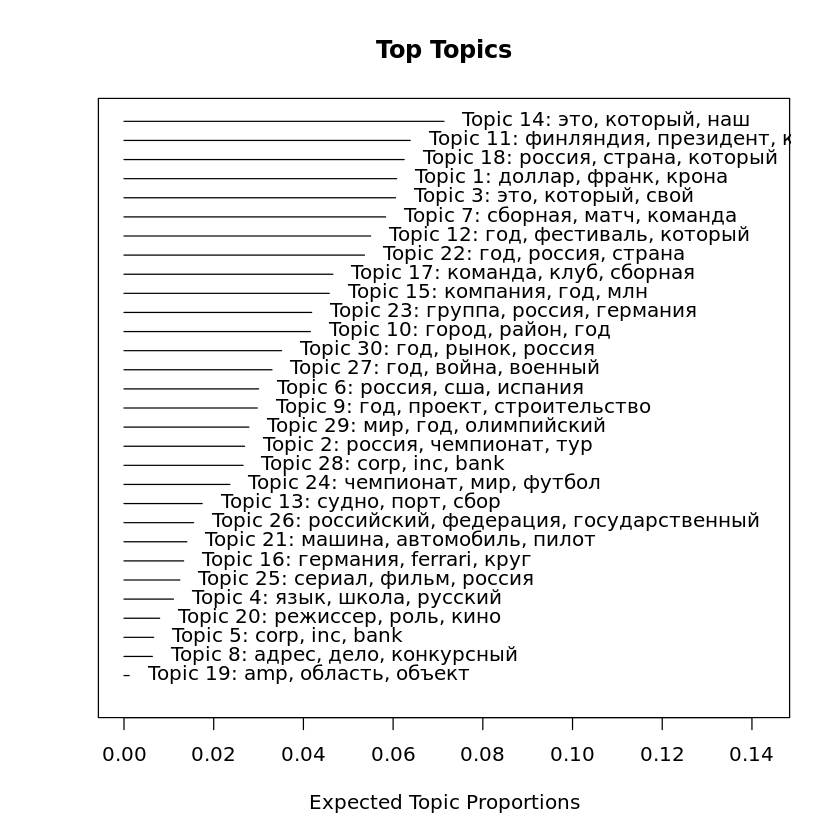

In [74]:
plot(model.fit)


In [81]:
thought <- findThoughts(model.fit, texts=integrumfed$lemmas_content, topics=1, n=3)

#plotQuote takes a set of sentences
#plotQuote(thought$docs[[1]])

#we can use the generic plot as a shorthand which will make one plot per topic
#plot(thought)


ERROR: Error in findThoughts(model.fit, texts = integrumfed$lemmas_content, topics = 1, : Number of provided texts and number of documents modeled do not match


In [11]:
library(stm)
out <- readRDS('out_integrum_federal.rds')


In [12]:
model.fit <- readRDS("STMfed30.rds")

In [13]:
prep1 <- estimateEffect(1:30 ~ s(year), model.fit,meta = out$meta, uncertainty = "Global")
saveRDS(prep1, "prep1_integrum_federal.rds")

In [3]:
library("stm")

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


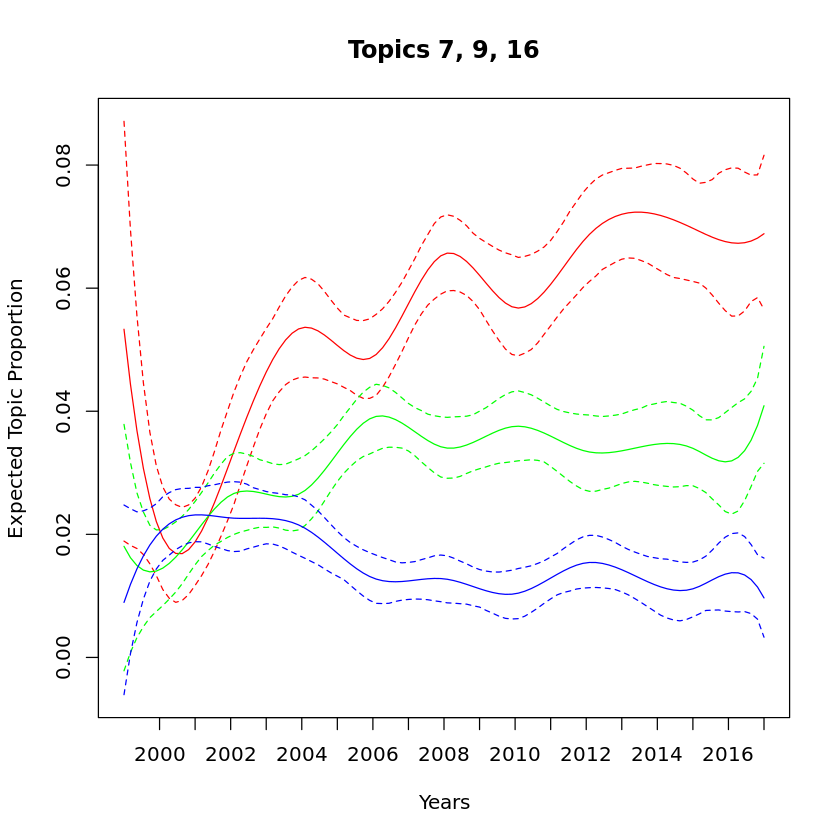

In [10]:
plot(
  prep1, "year", 
  method = "continuous", 
  topics = c(7,9,16), 
  printlegend = FALSE,
  xaxt = "n",
  xlab = "Years",
  main = "Topics 7, 9, 16")
axis(1,at=seq(from=2000, to=2017,by=1))

In [56]:
ls()

[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

In [68]:
saveRDS(prep, "prep_integrum_federal")

In [ ]:
prep <- estimateEffect(c(1) ~ treatment, gadarianFit, gadarian)
summary(prep)
plot(prep, "year", model=model.fit, method="pointestimate")

In [ ]:
#Integrum regional subcorpus
regional_processed <- textProcessor(
  articlesintegrumreg$lemmas_content, 
  metadata = articlesintegrumreg,
  stem=FALSE,
  customstopwords = darianstopwords)

saveRDS(regional_processed, "processed_integrum_regional.rds")



In [ ]:
regional_out <- prepDocuments(
  regional_processed$documents, 
  regional_processed$vocab,
  regional_processed$meta,
  lower.thresh = 15)

saveRDS(regional_out, "out_integrum_regional.rds")


In [ ]:
regional_model_fit <- stm(
  regional_out$documents, 
  regional_out$vocab, 
  K = 30,
  prevalence =~ year, 
  max.em.its = 100,
  data = energy_out$meta, 
  init.type = "Spectral")

saveRDS(regional_model_fit, "STMreg30.rds")


In [53]:
ls()


[1] "articlesintegrumfed" "corp"                "corp1"              
 [4] "corp2"               "corp3"               "corp4"              
 [7] "corp5"               "corp6"               "corpdtm"            
[10] "corpLDA10"           "corpLDA30"           "corpvalmis"         
[13] "darianstopwords"     "integrumfed"         "integrumfed_id"     
[16] "integrumreg"         "LDA10terms"          "LDA30terms"         
[19] "model.fit"           "mod.out.corr"        "out"                
[22] "prep"                "processed"           "toSpace"

Topic 1 Top Words:
 	 Highest Prob: доллар, франк, крона, марка, евро, сша, фунт, английский, шведский, французский 
 	 FREX: крона, франк, доллар, фунт, марка, евро, лира, шведский, английский, итальянский 
 	 Lift: португальск, эскудо, reuter, иена, голландск, драхма, ирландски, лотовой, португаль, тенге 
 	 Score: крона, песета, франк, гульден, эскудо, фунт, иена, лира, доллар, марка 
Topic 2 Top Words:
 	 Highest Prob: россия, чемпионат, тур, очки, германия, норвегия, оба, динамо, положение, кубок 
 	 FREX: финикс, миннесота, филадельфия, даллас, чикаго, ньюджерси, atlanta, бостон, овертайм, детройт 
 	 Lift: athletic, bastia, bologna, brescia, chievo, cibona, clippers, cologne, espanyol, fiorentina 
 	 Score: чемпионат, овертайм, динамо, кубок, матч, очки, буллит, финикс, очко, бросок 
Topic 3 Top Words:
 	 Highest Prob: это, который, свой, год, говорить, наш, становиться, знать, время, жить 
 	 FREX: мама, сидеть, муж, отец, бабушка, ndash, спрашивать, любить, папа, laquo 
 	 Lif

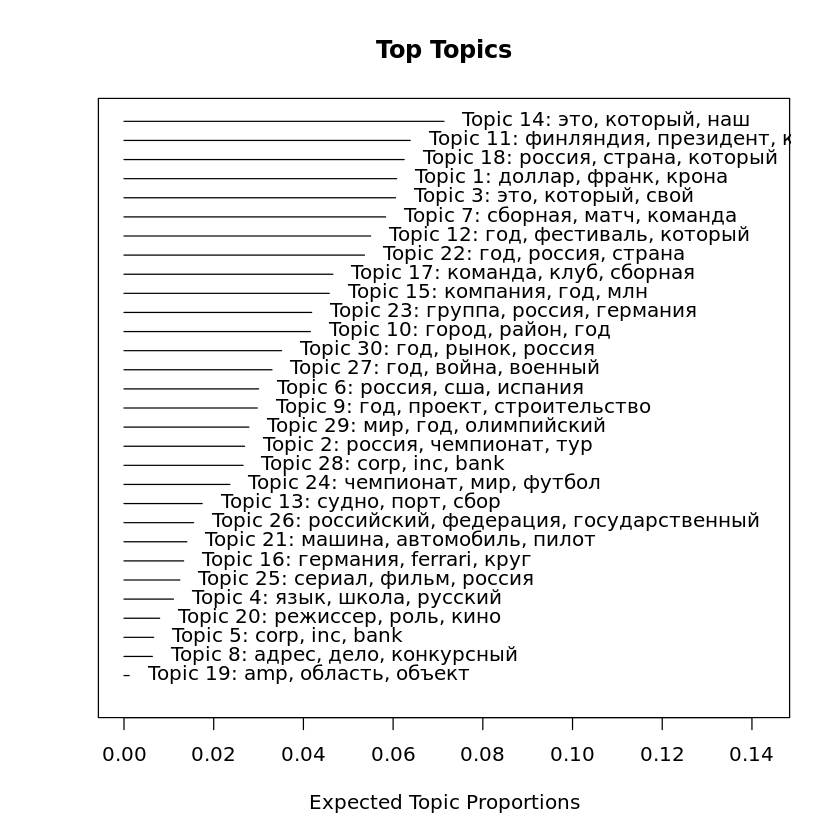

In [48]:
labelTopics(model.fit, topics = NULL, n = 10, frexweight = 0.8)
plot(model.fit, "summary")

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



ERROR: Error in plot.topicCorr(mod.out.corr): Install the igraph package to use this function.
